## importing libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## loading the dataset

In [2]:
df = pd.read_csv("churn.csv")
df.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


In [3]:
df.shape

(3150, 14)

In [4]:
df.Churn.value_counts()

0    2655
1     495
Name: Churn, dtype: int64

<Axes: >

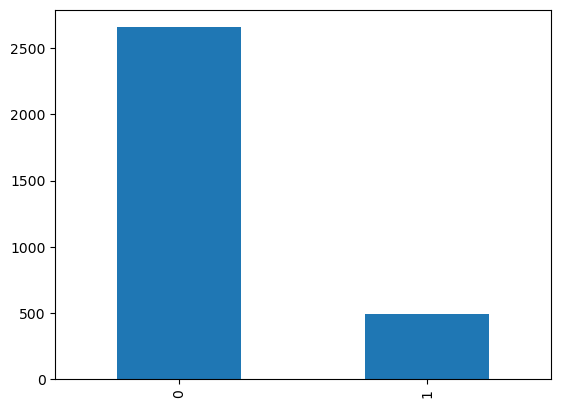

In [5]:
df.Churn.value_counts().plot(kind='bar')

## model selection and training

In [6]:
X = df.drop("Churn", axis=1)
y = df['Churn']


In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [8]:
y_train.value_counts()

0    2135
1     385
Name: Churn, dtype: int64

### the above value shows the imbalance in the X and Y data points

In [9]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=2000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=2000)

In [10]:
y_pred = model.predict(X_test)
from sklearn.metrics import classification_report
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       520
           1       0.73      0.42      0.53       110

    accuracy                           0.87       630
   macro avg       0.81      0.69      0.73       630
weighted avg       0.86      0.87      0.86       630



### from the above report we notice the recall value of 1(cutomer not interested) is 42 but we want to increase it because it is important that the customer should be interested

## using imblearn to increase the recall value

# >>>>using under sampling in traning data

In [11]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_train_rus,y_train_rus = rus.fit_resample(X_train,y_train)

In [12]:
y_train_rus.value_counts()

0    385
1    385
Name: Churn, dtype: int64

### the above value shows the balance in the X and Y data points ie the value of 0 is reduced to the value of 1


In [14]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=2000)
model.fit(X_train_rus,y_train_rus)
y_pred_rus = model.predict(X_test)
from sklearn.metrics import classification_report
report = classification_report(y_test,y_pred_rus)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.82      0.88       520
           1       0.49      0.81      0.61       110

    accuracy                           0.82       630
   macro avg       0.72      0.82      0.75       630
weighted avg       0.87      0.82      0.83       630



### from the above report we notice the recall value of 1(cutomer not interested) is 82 

# >>>>using over sampling in test data

In [15]:
from imblearn.over_sampling import SMOTEN
smote = SMOTEN(random_state=42)
X_train_smote,y_train_smote = smote.fit_resample(X_train,y_train)

In [16]:
y_train_smote.value_counts()

0    2135
1    2135
Name: Churn, dtype: int64

### the above value shows the balance in the X and Y data points ie the value of 1 is made eqal to 0


In [17]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=2000)
model.fit(X_train_smote,y_train_smote)
y_pred_smote = model.predict(X_test)
from sklearn.metrics import classification_report
report = classification_report(y_test,y_pred_smote)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.84      0.89       520
           1       0.51      0.79      0.62       110

    accuracy                           0.83       630
   macro avg       0.73      0.82      0.76       630
weighted avg       0.87      0.83      0.85       630



### from the above report we notice the recall value of 1(cutomer not interested) is 79 

# >>>>using SMOTE tomek

In [21]:
from imblearn.combine import SMOTETomek
tomek = SMOTETomek(random_state=42)
X_train_tomek,y_train_tomek = tomek.fit_resample(X_train,y_train)

In [22]:
y_train_tomek.value_counts()

0    2108
1    2108
Name: Churn, dtype: int64

### tin this some of the value points are deleted due to the near by values of minor and major


In [24]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=2000)
model.fit(X_train_tomek,y_train_tomek)
y_pred_tomek = model.predict(X_test)
from sklearn.metrics import classification_report
report = classification_report(y_test,y_pred_tomek)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.80      0.87       520
           1       0.46      0.80      0.59       110

    accuracy                           0.80       630
   macro avg       0.71      0.80      0.73       630
weighted avg       0.86      0.80      0.82       630



### from the above report we notice the recall value of 1(cutomer not interested) is 80